In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Beauty and the Beast],...",8.016638659240193,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/
246,"[\n 247.\n , [Gandhi], \n, [(1982)],...",8.015336192179165,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.014453635837908,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/
248,"[\n 249.\n , [The Handmaiden], \n, [...",8.01277370318714,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [9]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

**Задача 1.**

---


**Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен.**


In [10]:
crew_list = data["crew"].tolist()

In [11]:
crew_list = [s.replace(" (dir.)", "") for s in crew_list]
crew_list

['Frank Darabont, Tim Robbins, Morgan Freeman',
 'Francis Ford Coppola, Marlon Brando, Al Pacino',
 'Christopher Nolan, Christian Bale, Heath Ledger',
 'Francis Ford Coppola, Al Pacino, Robert De Niro',
 'Sidney Lumet, Henry Fonda, Lee J. Cobb',
 'Steven Spielberg, Liam Neeson, Ralph Fiennes',
 'Peter Jackson, Elijah Wood, Viggo Mortensen',
 'Quentin Tarantino, John Travolta, Uma Thurman',
 'Peter Jackson, Elijah Wood, Ian McKellen',
 'Sergio Leone, Clint Eastwood, Eli Wallach',
 'Robert Zemeckis, Tom Hanks, Robin Wright',
 'David Fincher, Brad Pitt, Edward Norton',
 'Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt',
 'Peter Jackson, Elijah Wood, Ian McKellen',
 'Irvin Kershner, Mark Hamill, Harrison Ford',
 'Lana Wachowski, Keanu Reeves, Laurence Fishburne',
 'Martin Scorsese, Robert De Niro, Ray Liotta',
 'Milos Forman, Jack Nicholson, Louise Fletcher',
 'David Fincher, Morgan Freeman, Brad Pitt',
 'Akira Kurosawa, Toshirô Mifune, Takashi Shimura',
 'Frank Capra, James Ste

In [12]:
crew_list = ' '.join(crew_list)
crew_list

"Frank Darabont, Tim Robbins, Morgan Freeman Francis Ford Coppola, Marlon Brando, Al Pacino Christopher Nolan, Christian Bale, Heath Ledger Francis Ford Coppola, Al Pacino, Robert De Niro Sidney Lumet, Henry Fonda, Lee J. Cobb Steven Spielberg, Liam Neeson, Ralph Fiennes Peter Jackson, Elijah Wood, Viggo Mortensen Quentin Tarantino, John Travolta, Uma Thurman Peter Jackson, Elijah Wood, Ian McKellen Sergio Leone, Clint Eastwood, Eli Wallach Robert Zemeckis, Tom Hanks, Robin Wright David Fincher, Brad Pitt, Edward Norton Christopher Nolan, Leonardo DiCaprio, Joseph Gordon-Levitt Peter Jackson, Elijah Wood, Ian McKellen Irvin Kershner, Mark Hamill, Harrison Ford Lana Wachowski, Keanu Reeves, Laurence Fishburne Martin Scorsese, Robert De Niro, Ray Liotta Milos Forman, Jack Nicholson, Louise Fletcher David Fincher, Morgan Freeman, Brad Pitt Akira Kurosawa, Toshirô Mifune, Takashi Shimura Frank Capra, James Stewart, Donna Reed Jonathan Demme, Jodie Foster, Anthony Hopkins Steven Spielberg, 

In [13]:
len(crew_list)

11299

In [14]:
crew_list = crew_list.split(',')

i = 0
for word in list(crew_list):  
    if crew_list.count(word) > 1:
        crew_list.remove(word)
print(crew_list)

['Frank Darabont', ' Tim Robbins', ' Morgan Freeman Francis Ford Coppola', ' Al Pacino Christopher Nolan', ' Heath Ledger Francis Ford Coppola', ' Robert De Niro Sidney Lumet', ' Lee J. Cobb Steven Spielberg', ' Liam Neeson', ' Ralph Fiennes Peter Jackson', ' Viggo Mortensen Quentin Tarantino', ' John Travolta', ' Uma Thurman Peter Jackson', ' Ian McKellen Sergio Leone', ' Eli Wallach Robert Zemeckis', ' Robin Wright David Fincher', ' Edward Norton Christopher Nolan', ' Joseph Gordon-Levitt Peter Jackson', ' Elijah Wood', ' Ian McKellen Irvin Kershner', ' Harrison Ford Lana Wachowski', ' Keanu Reeves', ' Laurence Fishburne Martin Scorsese', ' Ray Liotta Milos Forman', ' Louise Fletcher David Fincher', ' Morgan Freeman', ' Brad Pitt Akira Kurosawa', ' Takashi Shimura Frank Capra', ' Donna Reed Jonathan Demme', ' Jodie Foster', ' Anthony Hopkins Steven Spielberg', ' Matt Damon Fernando Meirelles', ' Alexandre Rodrigues', ' Leandro Firmino Roberto Benigni', ' Roberto Benigni', ' Nicoletta

In [15]:
len(crew_list)

433

### Задача 2. Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

In [16]:
crew_list = data["crew"].tolist()
crew_list

['Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
 'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
 'Christopher Nolan (dir.), Christian Bale, Heath Ledger',
 'Francis Ford Coppola (dir.), Al Pacino, Robert De Niro',
 'Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb',
 'Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes',
 'Peter Jackson (dir.), Elijah Wood, Viggo Mortensen',
 'Quentin Tarantino (dir.), John Travolta, Uma Thurman',
 'Peter Jackson (dir.), Elijah Wood, Ian McKellen',
 'Sergio Leone (dir.), Clint Eastwood, Eli Wallach',
 'Robert Zemeckis (dir.), Tom Hanks, Robin Wright',
 'David Fincher (dir.), Brad Pitt, Edward Norton',
 'Christopher Nolan (dir.), Leonardo DiCaprio, Joseph Gordon-Levitt',
 'Peter Jackson (dir.), Elijah Wood, Ian McKellen',
 'Irvin Kershner (dir.), Mark Hamill, Harrison Ford',
 'Lana Wachowski (dir.), Keanu Reeves, Laurence Fishburne',
 'Martin Scorsese (dir.), Robert De Niro, Ray Liotta',
 'Milos Forman (dir.), Jack Nicholson, Louise Fletch

In [17]:
crew_list = [words for crew_list in crew_list for words in crew_list.split(',')]

In [18]:
r = re.compile(".*(dir.)")
directors_list = list(filter(r.match, crew_list)) 
directors_list

['Frank Darabont (dir.)',
 'Francis Ford Coppola (dir.)',
 'Christopher Nolan (dir.)',
 'Francis Ford Coppola (dir.)',
 'Sidney Lumet (dir.)',
 'Steven Spielberg (dir.)',
 'Peter Jackson (dir.)',
 'Quentin Tarantino (dir.)',
 'Peter Jackson (dir.)',
 'Sergio Leone (dir.)',
 'Robert Zemeckis (dir.)',
 'David Fincher (dir.)',
 'Christopher Nolan (dir.)',
 'Peter Jackson (dir.)',
 'Irvin Kershner (dir.)',
 'Lana Wachowski (dir.)',
 'Martin Scorsese (dir.)',
 'Milos Forman (dir.)',
 'David Fincher (dir.)',
 'Akira Kurosawa (dir.)',
 'Frank Capra (dir.)',
 'Jonathan Demme (dir.)',
 'Steven Spielberg (dir.)',
 'Fernando Meirelles (dir.)',
 'Roberto Benigni (dir.)',
 'Frank Darabont (dir.)',
 'George Lucas (dir.)',
 'Christopher Nolan (dir.)',
 'James Cameron (dir.)',
 'Robert Zemeckis (dir.)',
 'Hayao Miyazaki (dir.)',
 'Alfred Hitchcock (dir.)',
 'Luc Besson (dir.)',
 'Roman Polanski (dir.)',
 'Bong Joon Ho (dir.)',
 'Roger Allers (dir.)',
 'Ridley Scott (dir.)',
 'Tony Kaye (dir.)',
 'Brya

In [19]:
len(directors_list)

250

In [20]:
directors_list = [s.replace(" (dir.)", "") for s in directors_list]
directors_list

['Frank Darabont',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Francis Ford Coppola',
 'Sidney Lumet',
 'Steven Spielberg',
 'Peter Jackson',
 'Quentin Tarantino',
 'Peter Jackson',
 'Sergio Leone',
 'Robert Zemeckis',
 'David Fincher',
 'Christopher Nolan',
 'Peter Jackson',
 'Irvin Kershner',
 'Lana Wachowski',
 'Martin Scorsese',
 'Milos Forman',
 'David Fincher',
 'Akira Kurosawa',
 'Frank Capra',
 'Jonathan Demme',
 'Steven Spielberg',
 'Fernando Meirelles',
 'Roberto Benigni',
 'Frank Darabont',
 'George Lucas',
 'Christopher Nolan',
 'James Cameron',
 'Robert Zemeckis',
 'Hayao Miyazaki',
 'Alfred Hitchcock',
 'Luc Besson',
 'Roman Polanski',
 'Bong Joon Ho',
 'Roger Allers',
 'Ridley Scott',
 'Tony Kaye',
 'Bryan Singer',
 'Martin Scorsese',
 'Christopher Nolan',
 'Michael Curtiz',
 'Damien Chazelle',
 'Olivier Nakache',
 'Charles Chaplin',
 'Sergio Leone',
 'Masaki Kobayashi',
 'Isao Takahata',
 'Ridley Scott',
 'Alfred Hitchcock',
 'Charles Chaplin',
 'Christopher Nolan'

In [21]:
len(directors_list)

250

In [22]:
data['Directors'] = directors_list

In [23]:
data.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet


In [24]:
import matplotlib.pyplot as plt

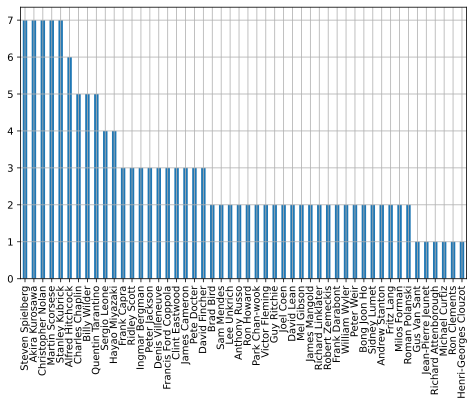

In [25]:
data.Directors.value_counts()[0:50].plot(kind='bar') # режиссер & кол-во фильмов (т.е.сколько раз встречается какой-л.режиссер). Визаулизированы только первые 50, т.к. всего их слишком много, на графике ничего не видно. 
plt.grid()
plt.show()

In [26]:
data.Directors.value_counts().loc[lambda x: x == x.max()]

Steven Spielberg     7
Akira Kurosawa       7
Christopher Nolan    7
Martin Scorsese      7
Stanley Kubrick      7
Name: Directors, dtype: int64

In [27]:
data['ratings']

0      9.239990254806843
1      9.160986633758483
2      8.993877881845709
3      8.990099715080536
4      8.950793754184206
             ...        
245    8.016638659240193
246    8.015336192179165
247    8.014453635837908
248     8.01277370318714
249    8.008715113372896
Name: ratings, Length: 250, dtype: object

In [28]:
data_top_rank = data.sort_values(by=['ratings'], ascending=False)

In [29]:
data_top_rank.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet


In [30]:
data.Directors.value_counts().loc[lambda x: x == x.max()]

Steven Spielberg     7
Akira Kurosawa       7
Christopher Nolan    7
Martin Scorsese      7
Stanley Kubrick      7
Name: Directors, dtype: int64

In [31]:
data.groupby('Directors').size().sort_values(ascending=False)[:15]

Directors
Steven Spielberg     7
Martin Scorsese      7
Stanley Kubrick      7
Christopher Nolan    7
Akira Kurosawa       7
Alfred Hitchcock     6
Quentin Tarantino    5
Billy Wilder         5
Charles Chaplin      5
Hayao Miyazaki       4
Sergio Leone         4
Ridley Scott         3
James Cameron        3
Clint Eastwood       3
Frank Capra          3
dtype: int64

In [32]:
data['ratings'] = data['ratings'].astype(float, errors = 'raise')

In [33]:
data.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993878,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet


In [34]:
data.groupby(["Directors"]).apply(lambda x: x.sort_values(["ratings"], ascending = False)).reset_index(drop=True).head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 124.\n , [Like Stars on Earth], ...",8.218987,"Aamir Khan (dir.), Darsheel Safary, Aamir Khan",/title/tt0986264/,Like Stars on Earth,2007,Aamir Khan
1,"[\n 205.\n , [Mary and Max], \n, [(2...",8.066440,"Adam Elliot (dir.), Toni Collette, Philip Seym...",/title/tt0978762/,Mary and Max,2009,Adam Elliot
2,"[\n 20.\n , [Seven Samurai], \n, [(1...",8.604297,"Akira Kurosawa (dir.), Toshirô Mifune, Takashi...",/title/tt0047478/,Seven Samurai,1954,Akira Kurosawa
3,"[\n 92.\n , [High and Low], \n, [(19...",8.265856,"Akira Kurosawa (dir.), Toshirô Mifune, Yutaka ...",/title/tt0057565/,High and Low,1963,Akira Kurosawa
4,"[\n 114.\n , [Ikiru], \n, [(1952)], \n]",8.230727,"Akira Kurosawa (dir.), Takashi Shimura, Nobuo ...",/title/tt0044741/,Ikiru,1952,Akira Kurosawa


In [35]:
import numpy as np

In [36]:
directors_rating = data.groupby('Directors').agg({'ratings': [np.mean]})

In [37]:
directors_rating.head()

,ratings
,mean
Directors,
Aamir Khan,8.218987
Adam Elliot,8.066440
Akira Kurosawa,8.229071
Alejandro G. Iñárritu,8.027181
Alfred Hitchcock,8.271568


In [38]:
directors_rating.max()

ratings  mean    8.90402
dtype: float64

In [39]:
from pandas.api.types import is_numeric_dtype

dfs = []

for ratings in directors_rating.columns:
    top_values = []
    if is_numeric_dtype(directors_rating[ratings]):
        top_values = directors_rating[ratings].nlargest(n=5)
        dfs.append(pd.DataFrame({ratings: top_values}).reset_index(drop=True))
pd.concat(dfs, axis=1)

,ratings
,mean
0,8.904020
1,8.861042
2,8.824866
3,8.709741
4,8.680523


In [40]:
directors_rating.dtypes

ratings  mean    float64
dtype: object

In [41]:
directors_rating.astype(float).nlargest(5, ratings)

,ratings
,mean
Directors,
Frank Darabont,8.904020
Francis Ford Coppola,8.861042
Peter Jackson,8.824866
Irvin Kershner,8.709741
Lana Wachowski,8.680523


In [42]:
directors_rating.loc[directors_rating['ratings'].idxmax()]

,ratings
,mean
Directors,
Frank Darabont,8.90402


<AxesSubplot:>

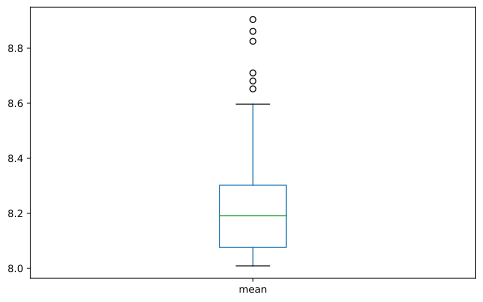

In [43]:
directors_rating['ratings'].plot(kind="box")

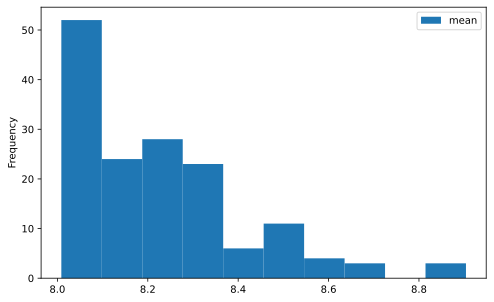

In [44]:
directors_rating['ratings'].plot(kind="hist");

### Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе

In [45]:
data.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993878,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet


In [46]:
df = data.assign(crew=data['crew'].str.split(',')).explode('crew')

In [47]:
df['crew'] = df['crew'].map(lambda x: x.rstrip('(dir.)'))

In [48]:
df.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Frank Darabont,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Tim Robbins,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Morgan Freeman,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160987,Francis Ford Coppola,/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160987,Marlon Brando,/title/tt0068646/,The Godfather,1972,Francis Ford Coppola


In [49]:
df['ratings'].nlargest(n=5)

0    9.239990
0    9.239990
0    9.239990
1    9.160987
1    9.160987
Name: ratings, dtype: float64

In [50]:
df.nlargest(n=5, columns=['ratings'])

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Frank Darabont,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Tim Robbins,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Morgan Freeman,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160987,Francis Ford Coppola,/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160987,Marlon Brando,/title/tt0068646/,The Godfather,1972,Francis Ford Coppola


In [51]:
df[df.columns[1:3]].head()

,ratings,crew
0,9.239990,Frank Darabont
0,9.239990,Tim Robbins
0,9.239990,Morgan Freeman
1,9.160987,Francis Ford Coppola
1,9.160987,Marlon Brando


In [52]:
df['crew'].value_counts()

 Robert De Niro        9
Christopher Nolan      7
Martin Scorsese        7
Stanley Kubrick        7
Akira Kurosawa         7
                      ..
 Patrick Stewart       1
 Ariadna Gil           1
 Matthew Broderick     1
 Lin-Manuel Miranda    1
 James Woods           1
Name: crew, Length: 536, dtype: int64

In [53]:
df.groupby(['crew'])['ratings'].mean()

crew
 Aamir Khan           8.237183
 Adrien Brody         8.511885
 Akira Ishihama       8.452972
 Akira Terao          8.167301
 Al Pacino            8.657296
                        ...   
Wes Anderson          8.078311
William Friedkin      8.038216
William Wyler         8.059394
Wolfgang Petersen     8.317128
Yasujirô Ozu          8.056858
Name: ratings, Length: 536, dtype: float64

In [54]:
df[df['crew'].str.contains('Morgan Freeman')]

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990,Morgan Freeman,/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
18,"[\n 19.\n , [Se7en], \n, [(1995)], \n]",8.611886,Morgan Freeman,/title/tt0114369/,Se7en,1995,David Fincher


In [55]:
df.groupby(['crew'])['ratings'].mean().nlargest(5)

crew
 Tim Robbins       9.239990
 Heath Ledge       8.993878
 Lee J. Cobb       8.950794
 Liam Neeson       8.940072
 Morgan Freeman    8.925938
Name: ratings, dtype: float64

### Задача 4. Построить распределение топовых фильмов по годам

In [56]:
df = data_top_rank[:10]

In [57]:
df

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet
5,"[\n 6.\n , [Schindler's List], \n, [...",8.940072012578215,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",/title/tt0108052/,Schindler's List,1993,Steven Spielberg
6,"[\n 7.\n , [The Lord of the Rings: T...",8.927413628894243,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",/title/tt0167260/,The Lord of the Rings: The Return of the King,2003,Peter Jackson
7,"[\n 8.\n , [Pulp Fiction], \n, [(199...",8.858796969977098,"Quentin Tarantino (dir.), John Travolta, Uma T...",/title/tt0110912/,Pulp Fiction,1994,Quentin Tarantino
8,"[\n 9.\n , [The Lord of the Rings: T...",8.811547466148356,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",/title/tt0120737/,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson
9,"[\n 10.\n , [The Good, the Bad and t...",8.802298949095261,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",/title/tt0060196/,"The Good, the Bad and the Ugly",1966,Sergio Leone


In [58]:
df[['movies', 'ratings', 'year']]

,movies,ratings,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,2008
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,1957
5,"[\n 6.\n , [Schindler's List], \n, [...",8.940072012578215,1993
6,"[\n 7.\n , [The Lord of the Rings: T...",8.927413628894243,2003
7,"[\n 8.\n , [Pulp Fiction], \n, [(199...",8.858796969977098,1994
8,"[\n 9.\n , [The Lord of the Rings: T...",8.811547466148356,2001
9,"[\n 10.\n , [The Good, the Bad and t...",8.802298949095261,1966


In [59]:
df.dtypes

movies       object
ratings      object
crew         object
links        object
title        object
year         object
Directors    object
dtype: object

In [60]:
df['ratings'] = df['ratings'].astype(float, errors = 'raise')
df['year'] = df['year'].astype(int, errors = 'raise')

<ipython-input-60-3e3b715e2409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['ratings'].astype(float, errors = 'raise')
<ipython-input-60-3e3b715e2409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int, errors = 'raise')


In [61]:
import seaborn as sns

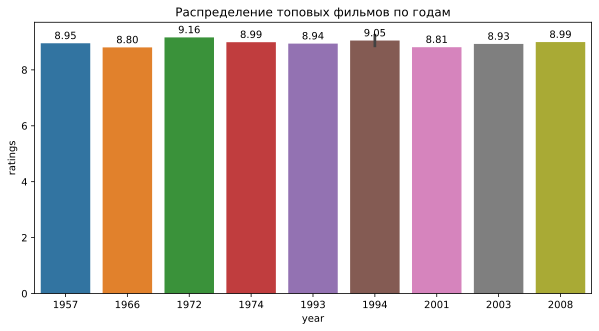

In [65]:
plt.figure(figsize=(10, 5))

plots = sns.barplot(x="year", y="ratings", data=df)
 
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')
 
plt.xlabel("year", size=10)
plt.ylabel("ratings", size=10)

#movies = ["12 Angry Men", "The Good, the Bad and the Ugly", "The Godfather", "The Godfather: Part II", "Schindler's List", 'The Shawshank Redemption+Pulp Fiction(mean)', 'The Lord of the Rings', 'The Lord of the Rings', 'The Dark Knight']

#plt.legend(movies, bbox_to_anchor=(1.05,1), loc = "upper left") 
plt.title("Распределение топовых фильмов по годам") # в 1994 г. 2 фильма, подчистан средний рейтинг
 
plt.show()

### Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

In [66]:
df = data_top_rank[:10]
df.head()

,movies,ratings,crew,links,title,year,Directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,"[\n 4.\n , [The Godfather: Part II],...",8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet


In [67]:
pd.options.display.max_colwidth = 200

In [68]:
print(df['movies'])

0                             [\n      1.\n      , [The Shawshank Redemption], \n, [(1994)], \n]
1                                        [\n      2.\n      , [The Godfather], \n, [(1972)], \n]
2                                      [\n      3.\n      , [The Dark Knight], \n, [(2008)], \n]
3                               [\n      4.\n      , [The Godfather: Part II], \n, [(1974)], \n]
4                                         [\n      5.\n      , [12 Angry Men], \n, [(1957)], \n]
5                                     [\n      6.\n      , [Schindler's List], \n, [(1993)], \n]
6        [\n      7.\n      , [The Lord of the Rings: The Return of the King], \n, [(2003)], \n]
7                                         [\n      8.\n      , [Pulp Fiction], \n, [(1994)], \n]
8    [\n      9.\n      , [The Lord of the Rings: The Fellowship of the Ring], \n, [(2001)], \n]
9                      [\n      10.\n      , [The Good, the Bad and the Ugly], \n, [(1966)], \n]
Name: movies, dtype: object


In [69]:
df['movies'].dtype

dtype('O')

In [70]:
df['movies'] = df['movies'].astype('str')

<ipython-input-70-efdfbe451069>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movies'] = df['movies'].astype('str')


In [71]:
import re

In [72]:
def find_movie(movie: str) -> str: # не знаю, зачем это делаю...
    match = re.search("^[^,]+, (.*)", movie) 
    if match:
        movie = match[1]
        
    match = re.search("^[^>]+(.*)", movie) 
    if match:
        movie = match[1]
        
    match  = re.search("^[>]+(.*)", movie) 
    if match:
        movie = match[1]
                       
    movie = re.sub("(<(.*))", "", movie) 

    return movie

In [73]:
df["movies"] = df["movies"].apply(find_movie)

<ipython-input-73-9b7c6dba95a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["movies"] = df["movies"].apply(find_movie)


In [74]:
df

,movies,ratings,crew,links,title,year,Directors
0,The Shawshank Redemption,9.239990254806843,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont
1,The Godfather,9.160986633758483,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola
2,The Dark Knight,8.993877881845709,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan
3,The Godfather: Part II,8.990099715080536,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola
4,12 Angry Men,8.950793754184206,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet
5,Schindler's List,8.940072012578215,"Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes",/title/tt0108052/,Schindler's List,1993,Steven Spielberg
6,The Lord of the Rings: The Return of the King,8.927413628894243,"Peter Jackson (dir.), Elijah Wood, Viggo Mortensen",/title/tt0167260/,The Lord of the Rings: The Return of the King,2003,Peter Jackson
7,Pulp Fiction,8.858796969977098,"Quentin Tarantino (dir.), John Travolta, Uma Thurman",/title/tt0110912/,Pulp Fiction,1994,Quentin Tarantino
8,The Lord of the Rings: The Fellowship of the Ring,8.811547466148356,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",/title/tt0120737/,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson
9,"The Good, the Bad and the Ugly",8.802298949095261,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",/title/tt0060196/,"The Good, the Bad and the Ugly",1966,Sergio Leone


In [75]:
df.dtypes

movies       object
ratings      object
crew         object
links        object
title        object
year         object
Directors    object
dtype: object

In [76]:
df['ratings'] = df['ratings'].astype(float, errors = 'raise')

<ipython-input-76-60c3d6201d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['ratings'].astype(float, errors = 'raise')


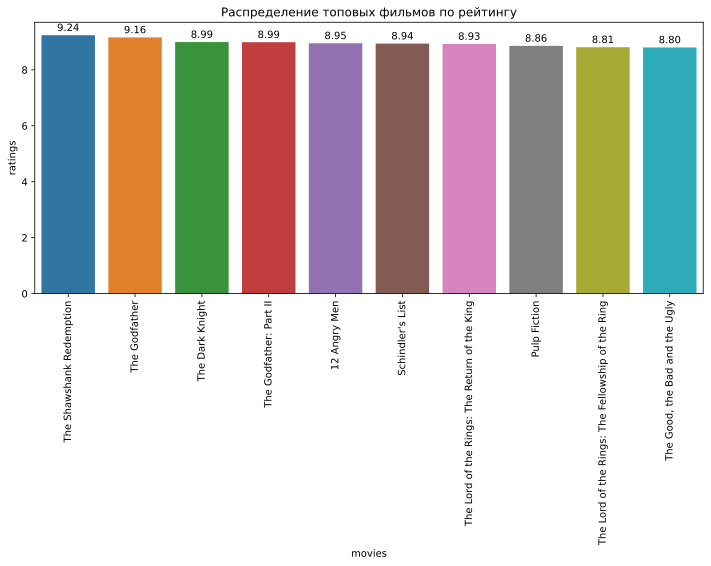

In [77]:
plt.figure(figsize=(12, 5))

plots = sns.barplot(x="movies", y="ratings", data=df, errwidth= 1)
 
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')
 
plt.xlabel("movies", size=10)
plt.ylabel("ratings", size=10)

plt.xticks(rotation=90)

plt.title("Распределение топовых фильмов по рейтингу")
 
plt.show()

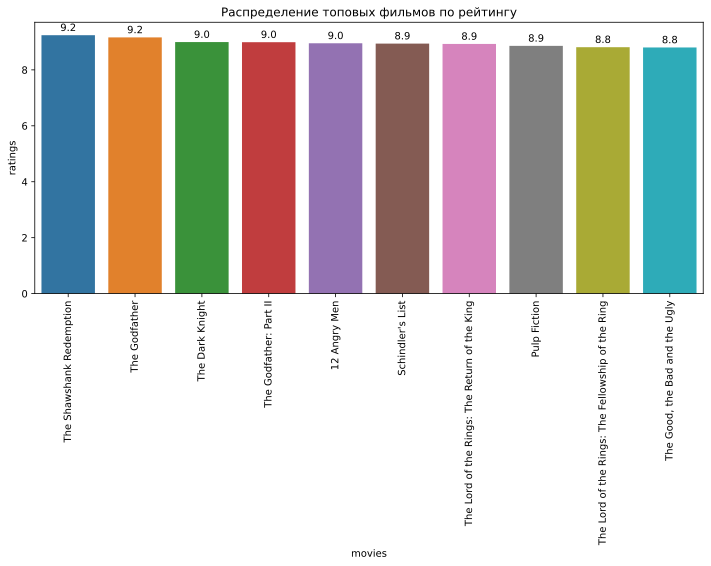

In [78]:
plt.figure(figsize=(12, 5))

plots = sns.barplot(x="movies", y="ratings", data=df, errwidth=1)
 
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')
 
plt.xlabel("movies", size=10)
plt.ylabel("ratings", size=10)

plt.xticks(rotation=90)


plt.title("Распределение топовых фильмов по рейтингу")
 
plt.show()

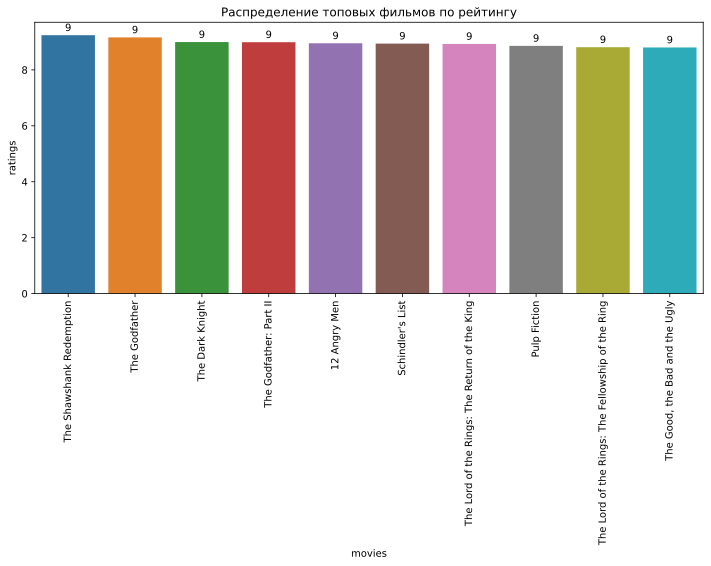

In [79]:
plt.figure(figsize=(12, 5))

plots = sns.barplot(x="movies", y="ratings", data=df, errwidth=1)
 
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')
 
plt.xlabel("movies", size=10)
plt.ylabel("ratings", size=10)

plt.xticks(rotation=90)

plt.title("Распределение топовых фильмов по рейтингу")
 
plt.show()

### Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [80]:
film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url).text

In [81]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.'

In [82]:
def get_description(link):
    film_url = 'http://www.imdb.com' + link
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    return soup.find_all(attrs={"name": "description"})[0].get("content")

In [83]:
from tqdm import tqdm

description = []

for i in tqdm(data.links.values):
    description.append(get_description(i))

100%|██████████| 250/250 [05:11<00:00,  1.24s/it]


In [85]:
data["description"] = description

In [86]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont,"The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede..."
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola,"The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf..."
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan,"The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ..."
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola,"The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye..."
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet,"12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a single member whose skeptical caut..."


### Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

In [87]:
def get_crew(text):
    text.replace("With", "with")
    finded = re.findall('With (.+?[a-z])\.', text)
    if len(finded) > 0:
        return finded[0]
    else:
        return ""

In [88]:
data["my_crew"] = data["description"].apply(get_crew)

In [89]:
data["my_crew"].head()

0        Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler
1    Marlon Brando, Al Pacino, James Caan, Richard S. Castellano
2     Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine
3         Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro
4        Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall
Name: my_crew, dtype: object

In [90]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont,"The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede...","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler"
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola,"The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf...","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano"
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan,"The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ...","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine"
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola,"The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye...","Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro"
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet,"12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a single member whose skeptical caut...","Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall"


In [91]:
my_crew_list = data['my_crew'].tolist()

In [92]:
no_crew = 0
for x in my_crew_list:
    if x == 'NA':
        no_crew += 1

In [93]:
print(no_crew)

0


Ни одной пустой ячейки не нашлось -> для всех фильмов были найдены актеры. 

### Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


In [94]:
def get_reviews():
    film_url = 'http://www.imdb.com/chart/top'
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    rev = []
    for tag in soup.find_all(attrs={'class': 'ratingColumn imdbRating'}):
        s = tag.find("strong").get("title")
        digit = re.findall("(?<=on)(.*)(?=user)", s)
        rev.append(int(digit[0].strip().replace(",", "")))
    return rev

In [95]:
data["reviews"] = get_reviews()

In [96]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew,reviews
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont,"The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede...","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2563461
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola,"The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf...","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",1764353
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan,"The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ...","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",2525486
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola,"The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye...","Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro",1221445
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet,"12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a single member whose skeptical caut...","Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall",757184


In [97]:
data[["title", "reviews"]].sort_values("reviews", ascending=False)[:10]

,title,reviews
0,The Shawshank Redemption,2563461
2,The Dark Knight,2525486
12,Inception,2250250
11,Fight Club,2017240
10,Forrest Gump,1977520
7,Pulp Fiction,1968582
15,The Matrix,1846137
8,The Lord of the Rings: The Fellowship of the Ring,1786280
6,The Lord of the Rings: The Return of the King,1764487
1,The Godfather,1764353


### Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов

In [98]:
from collections import Counter

In [99]:
import nltk 
import string
from nltk.tokenize import word_tokenize

In [100]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AlyaMac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [101]:
stopwords = stopwords.words('english') 

#### Топ 10 слов, которые встречаются в названии фильмов

In [102]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew,reviews
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont,"The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede...","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2563461
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola,"The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf...","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",1764353
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan,"The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ...","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",2525486
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,The Godfather: Part II,1974,Francis Ford Coppola,"The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye...","Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro",1221445
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet,"12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a single member whose skeptical caut...","Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall",757184


In [103]:
Counter(" ".join(data["title"]).split()).most_common(10) # это со стоп-словами, без предобработки текста

[('The', 63),
 ('the', 33),
 ('of', 30),
 ('and', 12),
 ('a', 7),
 ('to', 5),
 ('for', 5),
 ('A', 5),
 ('in', 4),
 ('Lord', 3)]

#### Включая preprocessing текста (исключаем стоп-слова)

In [104]:
data['title'] = data.title.str.replace("[^\w\s]", "").astype(str).str.lower()
data['title'] = data['title'].apply(lambda x: [item for item in x.split() if item not in stopwords])

<ipython-input-104-fb61034a3253>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data.title.str.replace("[^\w\s]", "").astype(str).str.lower()


In [105]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew,reviews
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,"[shawshank, redemption]",1994,Frank Darabont,"The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede...","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2563461
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,[godfather],1972,Francis Ford Coppola,"The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf...","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",1764353
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,"[dark, knight]",2008,Christopher Nolan,"The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ...","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",2525486
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,"[godfather, part, ii]",1974,Francis Ford Coppola,"The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye...","Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro",1221445
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,"[12, angry, men]",1957,Sidney Lumet,"12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a single member whose skeptical caut...","Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall",757184


In [106]:
data['title'] = data['title'].str.join(',')

In [107]:
data['title']

0      shawshank,redemption
1                 godfather
2               dark,knight
3         godfather,part,ii
4              12,angry,men
               ...         
245            beauty,beast
246                  gandhi
247                    help
248              handmaiden
249           dances,wolves
Name: title, Length: 250, dtype: object

In [108]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew,reviews
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,"shawshank,redemption",1994,Frank Darabont,"The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede...","Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2563461
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,godfather,1972,Francis Ford Coppola,"The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf...","Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",1764353
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,"dark,knight",2008,Christopher Nolan,"The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ...","Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",2525486
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,"godfather,part,ii",1974,Francis Ford Coppola,"The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye...","Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro",1221445
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,"12,angry,men",1957,Sidney Lumet,"12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a single member whose skeptical caut...","Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall",757184


In [109]:
data['title'] = data['title'].replace(',',' ', regex=True)

In [110]:
Counter(" ".join(data["title"]).split()).most_common(10)

[('lord', 3),
 ('rings', 3),
 ('star', 3),
 ('wars', 3),
 ('v', 3),
 ('life', 3),
 ('story', 3),
 ('father', 3),
 ('wild', 3),
 ('godfather', 2)]

#### Топ 10 слов, которые встречаются в описании фильмов

In [111]:
data['description']

0      The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual rede...
1      The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transf...
2      The Dark Knight: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, ...
3      The Godfather: Part II: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portraye...
4      12 Angry Men: Directed by Sidney Lumet. With Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall. The jury in a New York City murder trial is frustrated by a sin

In [112]:
Counter(" ".join(data["description"]).split()).most_common(10) # без предобработки текста

[('the', 364),
 ('a', 308),
 ('by', 297),
 ('With', 255),
 ('Directed', 250),
 ('to', 234),
 ('of', 233),
 ('and', 190),
 ('his', 144),
 ('in', 130)]

In [113]:
data['description'] = data.description.str.replace("[^\w\s]", "").astype(str).str.lower()
data['description'] = data['description'].apply(lambda x: [item for item in x.split() if item not in stopwords])

<ipython-input-113-babc1894ca22>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description'] = data.description.str.replace("[^\w\s]", "").astype(str).str.lower()


In [114]:
data['description'] = data['description'].str.join(',')

In [115]:
data['description'] = data['description'].replace(',',' ', regex=True)

In [116]:
Counter(" ".join(data["description"]).split()).most_common(10)

[('directed', 250),
 ('john', 31),
 ('life', 30),
 ('young', 29),
 ('two', 28),
 ('robert', 26),
 ('war', 24),
 ('help', 24),
 ('one', 22),
 ('james', 21)]

#### Топ 10 слов, которые встречаются в названии и описании фильмов

In [117]:
all_words = data['description'] + data['title'] # last version (=with preprocessing)
Counter(" ".join(all_words).split()).most_common(10)

[('directed', 250),
 ('john', 31),
 ('two', 30),
 ('young', 29),
 ('life', 28),
 ('robert', 26),
 ('war', 25),
 ('help', 24),
 ('one', 23),
 ('james', 21)]

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)

In [118]:
def get_genre(link):
    film_url = 'http://www.imdb.com' + link
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    tmp = soup.find_all(attrs={"class": "ipc-chip__text"})
    return [x.string for x in tmp if x.string[0].isupper()]

In [120]:
genre = []

for i in tqdm(data.links.values):
    genre.append(get_genre(i))

100%|██████████| 250/250 [05:03<00:00,  1.21s/it]


In [121]:
data["genre"] = genre

In [122]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew,reviews,genre
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,shawshank redemption,1994,Frank Darabont,shawshank redemption directed frank darabont tim robbins morgan freeman bob gunton william sadler two imprisoned men bond number years finding solace eventual redemption acts common decency,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2563461,[Drama]
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,godfather,1972,Francis Ford Coppola,godfather directed francis ford coppola marlon brando al pacino james caan richard castellano aging patriarch organized crime dynasty postwar new york city transfers control clandestine empire rel...,"Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",1764353,"[Crime, Drama]"
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,dark knight,2008,Christopher Nolan,dark knight directed christopher nolan christian bale heath ledger aaron eckhart michael caine menace known joker wreaks havoc chaos people gotham batman must accept one greatest psychological phy...,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",2525486,"[Action, Crime, Drama]"
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,godfather part ii,1974,Francis Ford Coppola,godfather part ii directed francis ford coppola al pacino robert duvall diane keaton robert de niro early life career vito corleone 1920s new york city portrayed son michael expands tightens grip ...,"Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro",1221445,"[Crime, Drama]"
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 angry men,1957,Sidney Lumet,12 angry men directed sidney lumet martin balsam john fiedler lee j cobb eg marshall jury new york city murder trial frustrated single member whose skeptical caution forces carefully consider evid...,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall",757184,"[Crime, Drama]"


In [123]:
data['genre'] = data['genre'].str.join(',')

In [124]:
data.head()

,movies,ratings,crew,links,title,year,Directors,description,my_crew,reviews,genre
0,"[\n 1.\n , [The Shawshank Redemption], \n, [(1994)], \n]",9.239990,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman",/title/tt0111161/,shawshank redemption,1994,Frank Darabont,shawshank redemption directed frank darabont tim robbins morgan freeman bob gunton william sadler two imprisoned men bond number years finding solace eventual redemption acts common decency,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",2563461,Drama
1,"[\n 2.\n , [The Godfather], \n, [(1972)], \n]",9.160987,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino",/title/tt0068646/,godfather,1972,Francis Ford Coppola,godfather directed francis ford coppola marlon brando al pacino james caan richard castellano aging patriarch organized crime dynasty postwar new york city transfers control clandestine empire rel...,"Marlon Brando, Al Pacino, James Caan, Richard S. Castellano",1764353,"Crime,Drama"
2,"[\n 3.\n , [The Dark Knight], \n, [(2008)], \n]",8.993878,"Christopher Nolan (dir.), Christian Bale, Heath Ledger",/title/tt0468569/,dark knight,2008,Christopher Nolan,dark knight directed christopher nolan christian bale heath ledger aaron eckhart michael caine menace known joker wreaks havoc chaos people gotham batman must accept one greatest psychological phy...,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",2525486,"Action,Crime,Drama"
3,"[\n 4.\n , [The Godfather: Part II], \n, [(1974)], \n]",8.990100,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro",/title/tt0071562/,godfather part ii,1974,Francis Ford Coppola,godfather part ii directed francis ford coppola al pacino robert duvall diane keaton robert de niro early life career vito corleone 1920s new york city portrayed son michael expands tightens grip ...,"Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro",1221445,"Crime,Drama"
4,"[\n 5.\n , [12 Angry Men], \n, [(1957)], \n]",8.950794,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 angry men,1957,Sidney Lumet,12 angry men directed sidney lumet martin balsam john fiedler lee j cobb eg marshall jury new york city murder trial frustrated single member whose skeptical caution forces carefully consider evid...,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G. Marshall",757184,"Crime,Drama"
